In [ ]:
import pynbody
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
from scipy import optimize
from astropy import units as unit
import sys

In [ ]:
datadir = '/media/juan/Pesquisa/Simulations_Chris_2021'

In [ ]:
# Masa Total de las componentes
# No. de partículas de cada componente
# El scale-length del disco de gas
# El scale-length del disco estelar
# La historia de formación de estrellas

In [ ]:
# Radial surface density of the disk
def density(pos,mass,n,limits):
    r       = np.sqrt((pos[:,:2]**2).sum(axis=1)) # Azymutal radius 
    histo   = np.histogram(r,n,range=limits)
    #plt.hist(r,n,range=limits)
    bins     = (histo[1][:-1]+histo[1][1:])/2
    bn_mass = np.zeros(n)
    for i in range(n):
            bn_mass[i]      = mass[(r >= histo[1][i])*(histo[1][i+1] > r)].sum()
    dens    = bn_mass/(np.pi)/((histo[1][1:])**2-(histo[1][:-1])**2)
    return histo,bins,dens

In [ ]:
def fit_exponential(x,y,limits):
    mask = (x >= limits[0])*(x <= limits[1])
    x = x[mask]
    y = y[mask]
    y = np.log10(y)
    # initial guess
    m_0 = (y[-1] - y[0])/(x[-1] - x[0])
    b_0 = y[0] - m_0*x[0]
    errfun  = lambda p: np.ravel(p[0]*x[:]+p[1]-y[:])
    fitparam = optimize.leastsq(errfun,[m_0,b_0],full_output=1)[0]
    m = fitparam[0]
    b = fitparam[1]
    return m,b

In [ ]:
def plot_exponential(bins,dens,m,b,filename):
    R = (-1./m)*np.log10(np.e)
    fig = plt.figure(figsize=(10, 7))
    plt.plot(bins, np.log10(dens), 'r.', Label = 'h = {a:3.2f}'.format(a = R))
    plt.plot(bins,m*bins+b,'-k')
    plt.legend(fontsize = 20, loc=0)
    plt.title('Perfil de densidad superficial de estrellas', fontsize = 18)
    plt.xlabel('Radio [Kpc]', fontsize = 20)
    plt.ylabel(r'$\rho$ [$1x10^{10}$ Msol/$kpc^{2}$]', fontsize = 20)
    plt.grid()
    plt.savefig(filename)
    plt.clf()
    plt.close()

In [ ]:
dicti = {}

galaxies = ['G0']#,'G1','G2','G3']

limites = {'G0':(0,12),'G1':(0,25),'G2':(0,30),'G3':(0,55)}

In [ ]:
for gal in galaxies:
    dicti[gal] = {}
    
    for snap in np.arange(0,11,1):     
        snap = str(snap).zfill(3)
        dicti[gal][snap] = {}
        
        data = pynbody.load(datadir+'/'+gal+'/snapshot_'+snap+'.hdf5')
        
        N_star = data.star['mass'].size
        dicti[gal][snap]['Nstar'] = N_star

        histo,bins,dens = density(data.gas['pos'],data.gas['mass'],n=20,limits=limites[gal])
        m,b = fit_exponential(bins,dens,limits=limites[gal])
        plot_exponential(bins,dens,m,b,filename='plots/'+gal+'_gas_'+snap+'.jpg')
        dicti[gal][snap]['h_gas'] = -1/m*np.log10(np.e)
        
        histo,bins,dens = density(data.star['pos'],data.star['mass'],n=20,limits=limites[gal])
        m,b = fit_exponential(bins,dens,limits=limites[gal])
        plot_exponential(bins,dens,m,b,filename='plots/'+gal+'_star_'+snap+'.jpg')
        dicti[gal][snap]['h_star'] = -1/m*np.log10(np.e)
        

/home/juan/anaconda3/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:508: RuntimeWarning: No unit information found!
  warnings.warn("No unit information found!", RuntimeWarning)
/home/juan/anaconda3/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:572: RuntimeWarning: No unit information found: using gadget-units.
  warnings.warn(
<ipython-input-61-f5ff21bbabff>:4: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.plot(bins, np.log10(dens), 'r.', Label = 'h = {a:3.2f}'.format(a = R))
<ipython-input-61-f5ff21bbabff>:4: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.plot(bins, np.log10(dens), 'r.', Label = 'h = {a:3.2f}'.format(a = R))
/home/juan/anaconda3/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:508: RuntimeWarning: No unit information found!
  warnings.warn("No unit inf

<ipython-input-61-f5ff21bbabff>:4: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.plot(bins, np.log10(dens), 'r.', Label = 'h = {a:3.2f}'.format(a = R))
/home/juan/anaconda3/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:508: RuntimeWarning: No unit information found!
  warnings.warn("No unit information found!", RuntimeWarning)
/home/juan/anaconda3/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:572: RuntimeWarning: No unit information found: using gadget-units.
  warnings.warn(
<ipython-input-31-2e938864d1a9>:5: RuntimeWarning: divide by zero encountered in log10
  y = np.log10(y)
<ipython-input-61-f5ff21bbabff>:4: RuntimeWarning: divide by zero encountered in log10
  plt.plot(bins, np.log10(dens), 'r.', Label = 'h = {a:3.2f}'.format(a = R))
<ipython-input-61-f5ff21bbabff>:4: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will

In [ ]:
dicti['G0']

{'001': {'Nstar': 11032,
  'h_gas': 1.1598354704153615,
  'h_star': 1.0691113181943899},
 '002': {'Nstar': 11045,
  'h_gas': 1.294359816791602,
  'h_star': 1.1048483740829322},
 '003': {'Nstar': 11049,
  'h_gas': 1.3685241872978455,
  'h_star': 1.1494044334201368},
 '004': {'Nstar': 11050, 'h_gas': 0.0, 'h_star': 1.1092487023913946},
 '005': {'Nstar': 11051, 'h_gas': 0.0, 'h_star': 1.14066452751348},
 '006': {'Nstar': 11053, 'h_gas': 0.0, 'h_star': 1.0958951322774046},
 '007': {'Nstar': 11057,
  'h_gas': 1.2016939700992388,
  'h_star': 1.0802023641374665},
 '008': {'Nstar': 11060,
  'h_gas': 1.1860671371659977,
  'h_star': 1.0193776412630873},
 '009': {'Nstar': 11068,
  'h_gas': 1.1795164740201065,
  'h_star': 0.9574113145309849},
 '010': {'Nstar': 11077,
  'h_gas': 1.2596200157074096,
  'h_star': 0.9852306324678115}}

In [ ]:
dicti['G0']['009']['Nstar']

/home/juan/anaconda3/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:508: RuntimeWarning: No unit information found!
  warnings.warn("No unit information found!", RuntimeWarning)
/home/juan/anaconda3/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:572: RuntimeWarning: No unit information found: using gadget-units.
  warnings.warn(


(array([ 494., 5121., 1910.,  885.,  473.,  317.,  208.,  139.,   67.,
          74.,   55.,   38.,   45.,   31.,   17.,   12.,   10.,   11.,
          11.,   13.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2,
        1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. ], dtype=float32),
 <BarContainer object of 20 artists>)

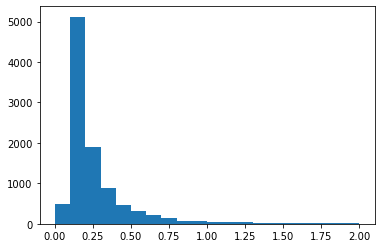

In [ ]:
plt.hist(data.gas['smooth'],bins=20,range=(0,2))

In [ ]:
gal = 'G3'
snap = '600'
data = pynbody.load(datadir+'/'+gal+'/snapshot_'+snap+'.hdf5')
N_star = data.star['mass'].size
print(N_star)
N_star = data.star['pos'].shape[0]
print(N_star)

70588
70588


In [ ]:
dicti = {'Nombre': 'Juan' , 'Apellido':'Basto' , 'CC': 12345678}

In [ ]:
dicti = {}

In [ ]:
dicti['Profesor'] = {'Nombre': 'Juan' , 'Apellido':'Basto' , 'CC': 12345678}

In [ ]:
dicti

{'Profesor': {'Nombre': 'Juan', 'Apellido': 'Basto', 'CC': 12345678}}

In [ ]:
dicti['Profesor']['Apellido']

'Basto'

In [ ]:
dicti['Estudiante1'] = {'Nombre': 'Danna' , 'Apellido':'Jaimes' , 'CC': 55554444}